### loading data & importing library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [3]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [4]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


df['price'] = data.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [10]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
price         float64
dtype: object

In [12]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
price          3842
dtype: int64

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### feature correlation  

In [16]:
corr = df.corr()

<Axes: >

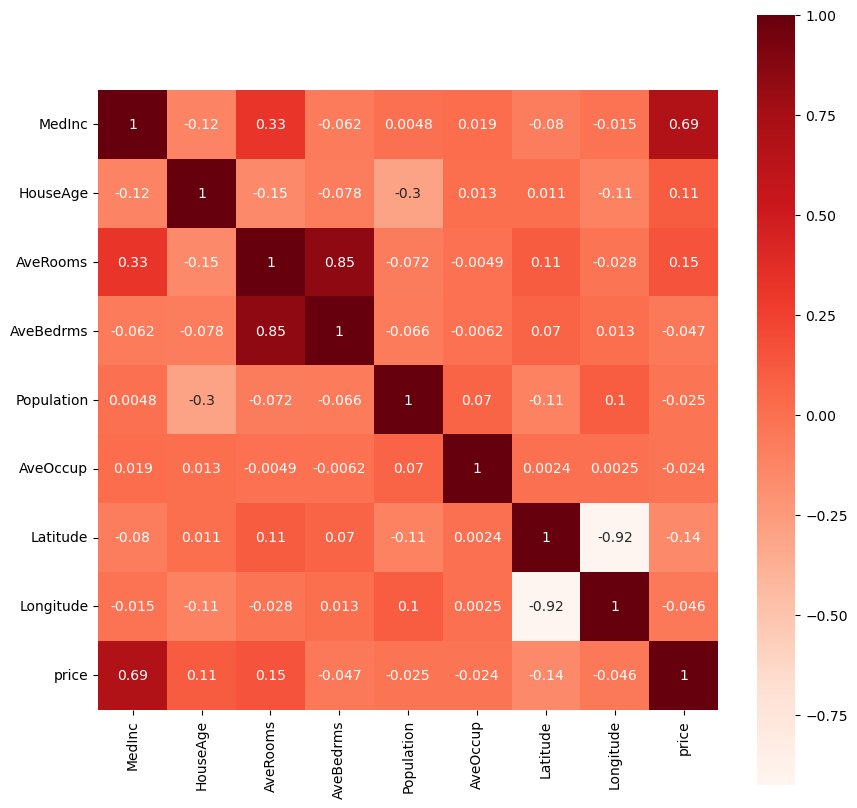

In [20]:
# heat map plot
plt.figure(figsize=(10 , 10))
sns.heatmap(corr , square= True , annot=True , cmap='Reds' )

# SLR vs MLR

### SLR

In [49]:
x = df[['MedInc']]
y =df['price']
print(len(x))
print(len(y))

20640
20640


In [50]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state = 4  )

In [51]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression() 
slr.fit(x_train , y_train)

LinearRegression()

In [52]:
slr.coef_

array([0.4163053])

In [53]:
slr.intercept_

0.45714019819848284

#### Evaluation(slr)

In [60]:
from sklearn import metrics

y_predict = slr.predict(x_train)

y_predict

array([1.35107258, 1.9246164 , 1.10203874, ..., 1.6215045 , 1.5700908 ,
       1.52592081])

In [61]:
# evaluate 
print('r^2 :', metrics.r2_score(y_train , y_predict))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train , y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train , y_predict)))

r^2 : 0.4746858522764793
MAE: 0.6283207799297094
MSE: 0.7050206811266955
RMSE: 0.8396550965287446


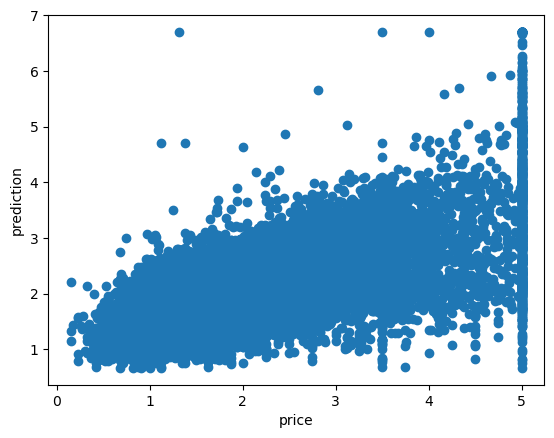

In [63]:
plt.scatter(y_train , y_predict)
plt.xlabel('price')
plt.ylabel('prediction')
plt.show()

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


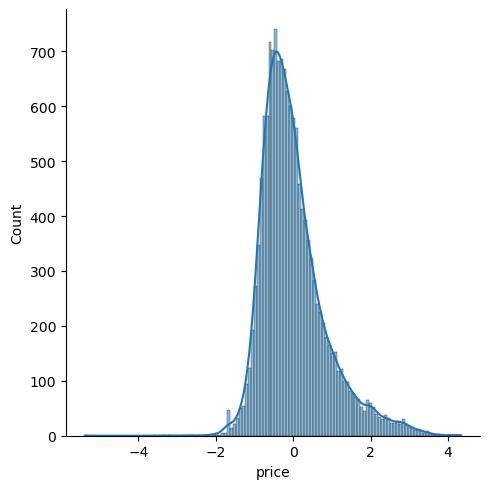

In [77]:
sns.displot(y_train - y_predict , kde = True)


# mlr (multiple linear regression)

In [65]:
x_2 = df.drop(['price'] , axis= 1)
y_2 = df['price']

In [89]:
x_2_test , x_2_train , y_2_test , y_2_train = train_test_split(x_2 , y_2 , test_size= 0.3 , random_state= 2)

In [69]:
mlr = LinearRegression()
mlr.fit(x_2_train , y_2_train)

LinearRegression()

In [71]:
predict = mlr.predict(x_2_train )
predict

array([2.76902312, 1.17016609, 1.51545204, ..., 1.80334149, 2.32934071,
       2.53025116])

In [72]:
print('r^2 :', metrics.r2_score(y_2_train , predict))
print('MAE:',metrics.mean_absolute_error(y_2_train, predict))
print('MSE:',metrics.mean_squared_error(y_2_train , predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_2_train , predict)))

r^2 : 0.6092947349194908
MAE: 0.5357647251576468
MSE: 0.5286125096099639
RMSE: 0.7270574321262138


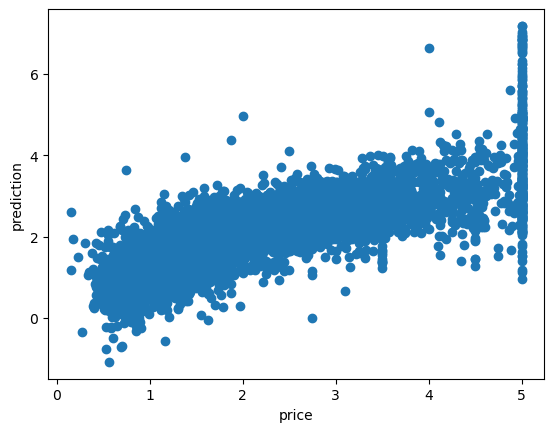

In [73]:
plt.scatter(y_2_train , predict)
plt.xlabel('price')
plt.ylabel('prediction')
plt.show()

c:\Users\mmdreiesi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


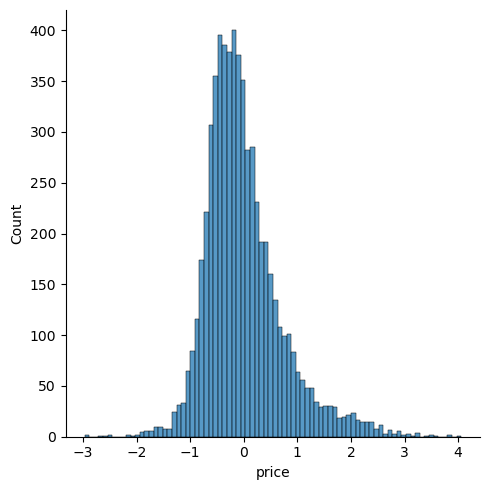

In [74]:
sns.displot(y_2_train - predict)


# polynomial linear regression

In [105]:
from sklearn.preprocessing import PolynomialFeatures



In [106]:
p_f = PolynomialFeatures(degree=3)
x_3_q = p_f.fit_transform(x_2_train)
q = LinearRegression()
q.fit(x_3_q , y_2_train)


LinearRegression()

In [107]:
y_q_p = q.predict(x_3_q)


In [108]:
print('r^2 :', metrics.r2_score(y_2_train , y_q_p))
print('MAE:',metrics.mean_absolute_error(y_2_train, y_q_p))
print('MSE:',metrics.mean_squared_error(y_2_train , y_q_p))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_2_train , y_q_p)))

r^2 : 0.7590253830122228
MAE: 0.40607844335963744
MSE: 0.32603143193363476
RMSE: 0.570991621596705


In [111]:
p_f = PolynomialFeatures(degree=3)
x_3_q = p_f.fit_transform(x_2_test)
q = LinearRegression()
q.fit(x_3_q , y_2_test)
y_test_predicted = q.predict(x_3_q)

In [112]:
y_q_p = q.predict(x_3_q)

In [114]:
print('r^2 :', metrics.r2_score(y_2_test , y_q_p))
print('MAE:',metrics.mean_absolute_error(y_2_test, y_q_p))
print('MSE:',metrics.mean_squared_error(y_2_test , y_q_p))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_2_test , y_q_p)))

r^2 : 0.7324835809601875
MAE: 0.42612238477574355
MSE: 0.35371961865553114
RMSE: 0.5947433216569407
